In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2
import os
import pickle
%matplotlib inline

# Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

The camera sees the 3D object in real world and transforms to 2D image. The transformation is imperfect which result in distorted images. Two types of distortion:

**Radial Distortion :** curvy images mostly at the edges due curved lens that makes light bend at the edges of lens

**Tangential Distortion :** Images appear tilted due to misalignment of lens and image plane(film/sensor)

Distortion Correction: As to correct, one has to first measure distortion. As we know distortion changes shape, size of objects in an image , we need to calibrate for that. How do we calibtrate? Take pictures of known shapes then only will be able to detect and correct for any distortion errors. We can choose any image for calibrating the camera, but we choose chessboard as it is known for regular high contrast pattern makes easy to detect automatically. Pictures of chessboard against a flat surface taken by camera. Map distorted points to undistorted points. Use OpenCV functions findChessboardCorners() and drawChessboardCorners() to automatically find and draw corners in your image.

### Step 1:                   Read Calibration images,extract corners( 2D image points)  and 3D objects points(real chessboard)

In [2]:
### i) Read in calibration images of chessboard. Recommended to use atleast 20 images taken at different angles and distances.
###    The images are in camera_cal folder.
###    Each chessboard has 9 x 6 corners to detect

import glob
images = glob.glob('camera_cal/calibration*.jpg')

### ii) Map 2D points(distorted) to 3D objects(undistorted)
### Arrays to store object poinsta and image points for all the images

objpoints =[]  #3D points in real world object
imgpoints =[]  #2D points in image plane

### Prepare object points like (0,0,0) (1,0,0)...... (8,5,0)
objp = np.zeros((9*6,3),np.float32)
### Take first 2 columns (x,y) as z is always 0 ,use numpy mgrid function to generate coordinates values 
### for given  gridsize and reshape into 2 columns
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x,y coordinates(2 columns) # the unspecified value(-1) is inferred to be 54

###openCV provides function to detect corners and it expects grayscale image as input

for fname in images:
    img = mpimage.imread(fname)

    ### Convert image into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    
    ### Finding chessboard corners (for an 9x6 board)
    ret , corners = cv2.findChessboardCorners(gray,(9,6),None) 
    
    if ret == False:
        print('corners not found {}'.format(fname))
    

    ### If corners are found, add objpoints and image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)   # always same for all calibration images as it represents the real chessboard object points
               
        # Drawing detected corners on an image:
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret) 

# Save objpoints and imgpoints
points_pickle = {}
points_pickle["objpoints"] = objpoints
points_pickle["imgpoints"] = imgpoints
points_pickle["imagesize"] = (img.shape[1], img.shape[0])
pickle.dump(points_pickle,open("camera_cal/wide_points_pickle.p", "wb" ))


corners not found camera_cal\calibration1.jpg
corners not found camera_cal\calibration4.jpg
corners not found camera_cal\calibration5.jpg


### Visualize sample calibration image and corners drawn

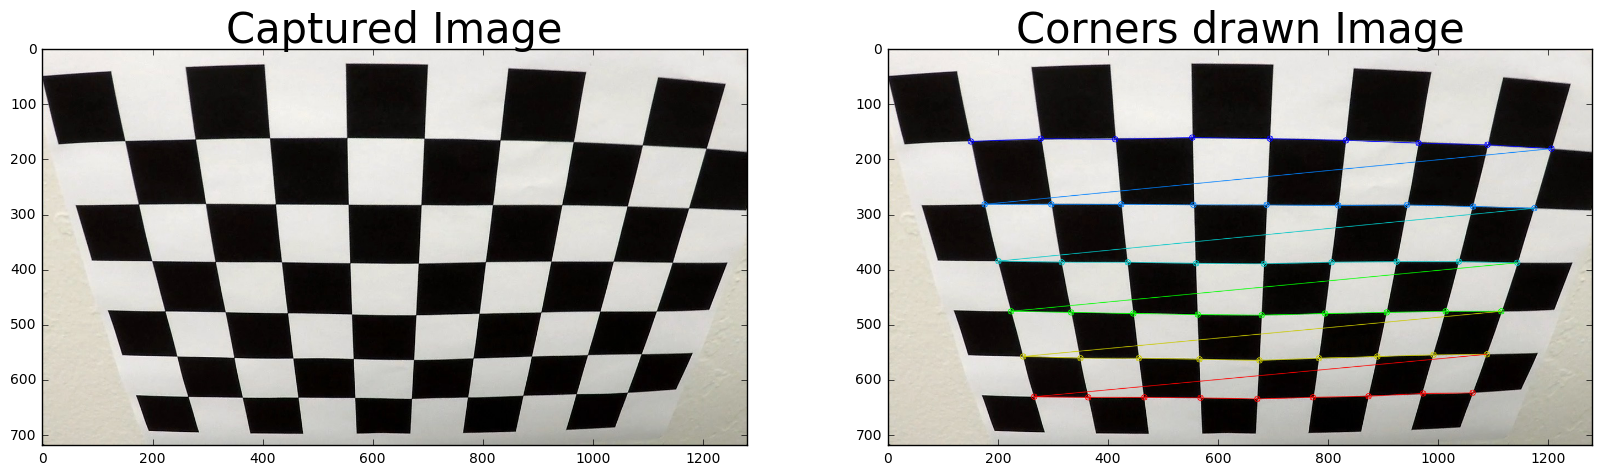

In [3]:
### Visualize anyone Calibration image which has corners and corners drawn 
### plot one of calibration image with corners drawn for example

image = mpimage.imread('./camera_cal/calibration2.jpg')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Captured Image', fontsize=30)

### Convert image into grayscale as findChessboardCorners needs grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    
### Finding chessboard corners (for an 9x6 board)
ret , corners = cv2.findChessboardCorners(gray,(9,6),None) 
    
if ret == False:
    print('corners not found')
img1 = cv2.drawChessboardCorners(image,(9,6),corners,ret) 

ax2.imshow(img1)
ax2.set_title('Corners drawn Image', fontsize=30)

### Step 2:  Camera calibration given object points, image points, and the shape of the grayscale image

In [4]:
### Camera calibration, given object points, image points, and the shape of the grayscale image:
### The shape of the image, which is passed into the calibrateCamera function, is just the height and width of the image
### Returned values are dist = distortion coefficients
### mtx = camera matrix that is needed to gtransform 3D object points to 2D image points
### position of camera with rotational and translational rvecs and tvecs

# Read in the saved objpoints and imgpoints
points_pickle = pickle.load( open( "./camera_cal/wide_points_pickle.p", "rb" ) )
objpoints = points_pickle["objpoints"]
imgpoints = points_pickle["imgpoints"]
img_size = points_pickle["imagesize"]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
dist_pickle["imagesize"] = img_size
pickle.dump( dist_pickle, open( "./camera_cal/wide_dist_pickle.p", "wb" ) )


# Apply a distortion correction to raw images.

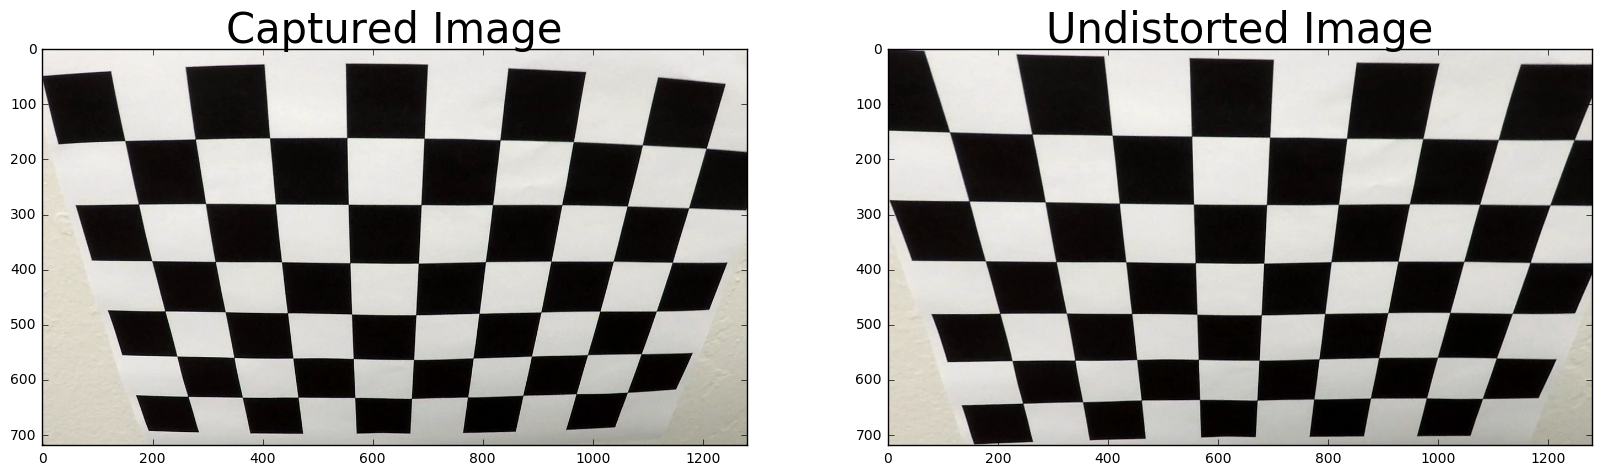

In [5]:
### Undistorting a captured image:

### Load camera calibration matrix and distortion coefficients
dist_pickle = pickle.load( open( "./camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle['mtx']
dist = dist_pickle['dist']
img_size = dist_pickle['imagesize']

img = mpimage.imread('./camera_cal/calibration2.jpg')
img_size1 = (img.shape[1], img.shape[0])

### Check the resolution of image to be undistorted is same as resolution of images used for calibration of camera
assert (img_size1 == img_size),'image size not compatible'
undist = cv2.undistort(img, mtx, dist, None, mtx)

### Visualize the captured 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Captured Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=30)